In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm 
import pylab as py 

In [3]:
# read csv
df = pd.read_csv('../data/Query_javascript/df_with_domain_and_commits_clean.csv')
df.head()

,name,owner,description,url,createdAt,users,watchers,stars,forks,projects,...,diskUsage,license,languages,primaryLanguage,environments,submodules,topics,extra,isApp,commits
0,informant,bigcartel,JavaScript that spies on your forms and warns ...,https://github.com/bigcartel/informant,2008-06-08,2,43,4,1,0,...,123,NaN,JavaScript,JavaScript,NaN,NaN,NaN,NaN,True,20.0
1,browsermips,reednj,Measure the speed of your browsers javascript,https://github.com/reednj/browsermips,2008-07-28,1,3,1,0,0,...,268,NaN,"PHP,CSS,JavaScript",JavaScript,NaN,NaN,NaN,NaN,True,49.0
2,Beer-Me,filmaj,Mobile application that tells you where the cl...,https://github.com/filmaj/Beer-Me,2009-07-15,1,10,97,23,0,...,7882,NaN,"C,Objective-C,JavaScript",JavaScript,NaN,NaN,NaN,NaN,True,64.0
3,slideshow,aglemann,Slideshow is a javascript class for Mootools 1...,https://github.com/aglemann/slideshow,2009-07-07,1,2,5,2,0,...,4021,NaN,JavaScript,JavaScript,NaN,"src/jquery/jquery,src/jquery/jquery-ui,spec/qunit",NaN,NaN,True,68.0
4,cogs,coiscir,(Not maintained) A few helpful JavaScript cogs.,https://github.com/coiscir/cogs,2009-04-24,1,2,2,0,0,...,180,MIT,"Ruby,JavaScript",JavaScript,NaN,NaN,NaN,NaN,True,71.0


In [4]:
df.shape

(13268, 22)

```commits``` column

In [5]:
# describe the 'commits' column
df['commits'].describe()

count    13268.000000
mean        40.393503
std        555.592968
min          1.000000
25%          3.000000
50%          8.000000
75%         20.000000
max      39938.000000
Name: commits, dtype: float64

<Axes: >

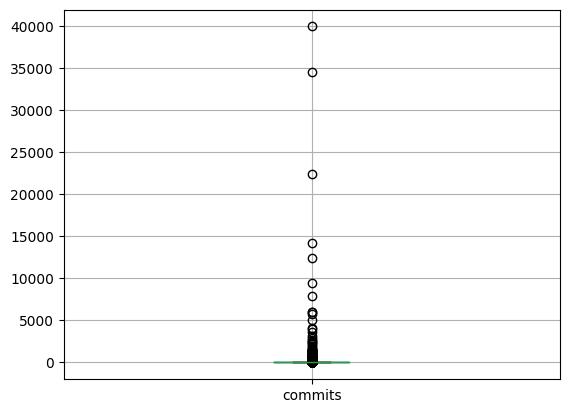

In [6]:
# plot boxplot for 'commits'
df.boxplot(column='commits')

In [7]:
df['commits'].value_counts()

commits
2.0       1827
3.0       1237
4.0        926
5.0        771
1.0        644
          ... 
317.0        1
259.0        1
831.0        1
5761.0       1
268.0        1
Name: count, Length: 403, dtype: int64

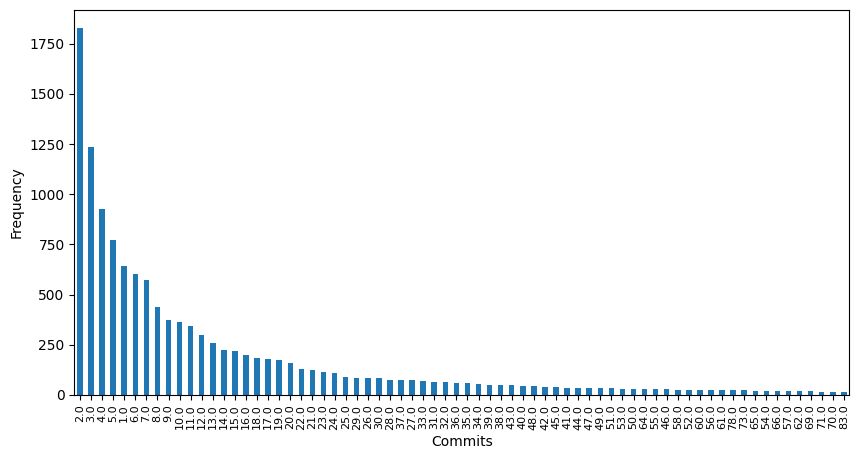

In [8]:
# commits value counts to draw a histogram
# x-axis: commits; y-axis: frequency
# plot only the top 70 commits to make the plot readable
df['commits'].value_counts().head(70).plot(kind='bar', figsize=(10, 5))
plt.xlabel('Commits', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.xticks(fontsize=8, rotation=90)
plt.show()

In [9]:
# plot the distribution of the 'commits' column
# x-axis is the repositories and y-axis is the commits value
plt.plot(df['commits'])

In [10]:
# drop commits less than 20, stars less than 2, pull_requests less than 9 in one go
df = df[(df['commits'] >= 20) & (df['stars'] >= 2) & (df['pullRequests'] >= 9)]
df.shape

(331, 22)

In [11]:
# calculate the popularity score for each repository
# popularity score = stars + forks + pullRequests^2
df['popularity'] = df['stars'] + df['forks'] + df['pullRequests']**2
df.shape

(331, 23)

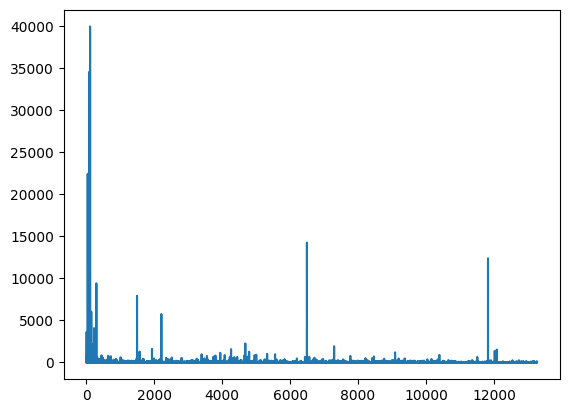

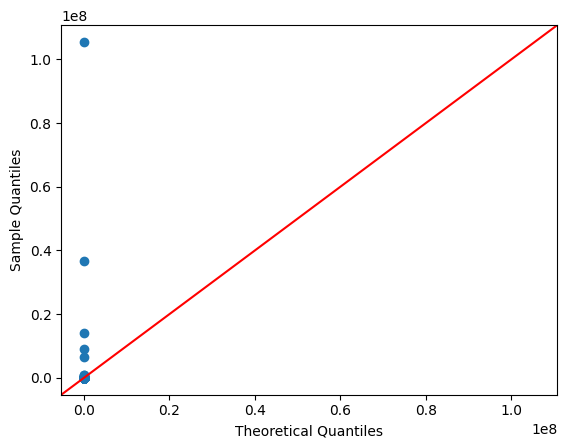

In [12]:
data_points = df['popularity']

sm.qqplot(data_points, line ='45')
py.show()

In [13]:
# sort the dataframe by the column 'popularity' with descending order
df = df.sort_values(by='popularity', ascending=False)

In [14]:
df.shape

(331, 23)

In [15]:
df

,name,owner,description,url,createdAt,users,watchers,stars,forks,projects,...,license,languages,primaryLanguage,environments,submodules,topics,extra,isApp,commits,popularity
46,ember.js,emberjs,Ember.js - A JavaScript framework for creating...,https://github.com/emberjs/ember.js,2011-05-25,30,855,22434,4369,0,...,MIT,"JavaScript,HTML,TypeScript,Handlebars",JavaScript,NaN,NaN,"ember,javascript,javascript-framework,hacktobe...",NaN,True,22418.0,105458627
116,cesium,CesiumGS,An open-source JavaScript library for world-cl...,https://github.com/CesiumGS/cesium,2012-03-02,18,468,11505,3340,0,...,Apache-2.0,"CSS,JavaScript,HTML,GLSL,TypeScript,Handlebars...",JavaScript,NaN,NaN,"3d,geospatial,gis,3d-tiles,cesium,3d-globe,glt...",NaN,True,39938.0,36823334
99,meteor,meteor,"Meteor, the JavaScript App Platform",https://github.com/meteor/meteor,2012-01-19,14,1566,43974,5429,0,...,NOASSERTION,"HTML,JavaScript,CSS,Shell,CoffeeScript,PowerSh...",JavaScript,"branch,commit,production,pull request",packages/non-core/blaze,"javascript,meteor,mongodb,build-system,npm,fra...",NaN,True,34583.0,14179484
6496,BGOONZ_BLOG_2.0,bgoonz,The new home of my blog/resource sharing websi...,https://github.com/bgoonz/BGOONZ_BLOG_2.0,2021-05-12,3,2,22,51,0,...,MIT,"JavaScript,Makefile,Shell,CSS,SCSS",JavaScript,"github-pages,Preview,Preview – bgoonz-blog,Pre...",NaN,"jamstack,ssg,headless,static,gatsby,git,javasc...",NaN,True,14253.0,9132557
151,travis-web,travis-ci,The Ember web client for Travis CI,https://github.com/travis-ci/travis-web,2012-06-17,15,44,608,338,0,...,MIT,"Ruby,HTML,JavaScript,Shell,Dockerfile,Makefile...",JavaScript,"com-production,com-staging,org-production,org-...",NaN,"ember,javascript,travis-ci",NaN,True,6040.0,6569915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6708,crappy-todo-app,octoi,todo app but bad,https://github.com/octoi/crappy-todo-app,2021-05-18,1,0,2,1,0,...,MIT,"HTML,CSS,JavaScript",JavaScript,github-pages,NaN,"todo,react,javascript",NaN,True,81.0,84
4973,chat-app-backend,MatheusIshiyama,This a backend to a websocket chat with jwt au...,https://github.com/MatheusIshiyama/chat-app-ba...,2021-04-02,1,2,2,1,0,...,MIT,JavaScript,JavaScript,NaN,NaN,"socket-io,jwt,jwtauthentication,jwt-authentica...",NaN,True,22.0,84
8519,Muzak,alissatroiano,Muzak is a front-end React application that us...,https://github.com/alissatroiano/Muzak,2022-04-13,1,1,2,0,0,...,NaN,"HTML,CSS,JavaScript",JavaScript,NaN,NaN,"html,javascript,react,reactjs,youtube-api",NaN,True,48.0,83
9713,ZapRecall,GabrielaTiago,App de flashcards com 3 decks de 8 cartões cad...,https://github.com/GabrielaTiago/ZapRecall,2022-05-12,1,1,2,0,0,...,NaN,"CSS,HTML,JavaScript",JavaScript,"Preview,Production",NaN,"flashcards,javascript,react",NaN,True,55.0,83


In [13]:
# take the row 31 to 60 of the dataframe and dump to csv
df.iloc[31:61].to_csv('../data/Query_javascript/js_popular_1.csv', index=False)

# take the row last 31 to 60 of the dataframe and dump to csv
# 271: 300
df.iloc[df.shape[0]-60:df.shape[0]-30].to_csv('../data/Query_javascript/js_unpopular_1.csv', index=False)

In [77]:
# take the first 30 rows of the dataframe and dump to csv
df.head(30).to_csv('../data/Query_javascript/js_popular.csv', index=False)

# take the last 30 rows of the dataframe and dump to csv
df.tail(30).to_csv('../data/Query_javascript/js_unpopular.csv', index=False)

In [23]:
df.iloc[60:65]

,name,owner,description,url,createdAt,users,watchers,stars,forks,projects,...,license,languages,primaryLanguage,environments,submodules,topics,extra,isApp,commits,popularity
1043,Broaden-io-client,Broaden-io,React Single Page Application as a discovery p...,https://github.com/Broaden-io/Broaden-io-client,2018-01-23,6,7,10,10,0,...,NaN,"HTML,CSS,JavaScript,Procfile,SCSS",JavaScript,NaN,NaN,"react-redux,frontend,webpack,bootstrap,babel-e...",NaN,True,383.0,13016
3752,hexapod,mithi,Blazing fast hexapod robot simulator for the w...,https://github.com/mithi/hexapod,2020-05-20,2,21,538,67,0,...,Apache-2.0,"HTML,JavaScript,CSS,Shell",JavaScript,github-pages,NaN,"robotics,robot,hexapod,visualizers,javascript,...",NaN,True,523.0,12705
18,Jcrop,tapmodo,Jcrop - The Javascript Image Cropping Engine,https://github.com/tapmodo/Jcrop,2010-09-22,1,219,4296,1013,0,...,NOASSERTION,"Shell,CSS,JavaScript",JavaScript,github-pages,NaN,NaN,NaN,True,148.0,12534
8468,IMDB-Project,dorlib,self-learned FullStack project,https://github.com/dorlib/IMDB-Project,2022-04-12,1,1,8,2,0,...,MIT,"Go,HTML,JavaScript,CSS,Dockerfile,Java",JavaScript,"Preview,Production",NaN,"apollo,entgo,golang,graphql,react,go,gqlgen,ja...",NaN,True,717.0,11674
1497,deklarota,arestov,JavaScript Functional Relational Reactive Fram...,https://github.com/arestov/deklarota,2018-03-04,1,3,24,5,0,...,NaN,"JavaScript,TypeScript,HTML",JavaScript,NaN,NaN,NaN,NaN,True,7916.0,11478


In [22]:
# take the last row of the dataframe and dump to csv
df.iloc[61:62].to_csv('../data/Query_javascript/js_popular_replacement.csv', index=False)